In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import permutation_importance
from sklearn.ensemble import GradientBoostingClassifier, HistGradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../../data/model_features.csv')
df = data.copy()

X = df.iloc[:,1:]
feature_names = X.columns
y = df.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = HistGradientBoostingClassifier(random_state=42, learning_rate=0.05, max_depth= None, max_iter=100, min_samples_leaf=25)

model.fit(X_train, y_train)

HistGradientBoostingClassifier(learning_rate=0.05, min_samples_leaf=25,
                               random_state=42)

/var/folders/_h/64nj1wx53dd0hd50xsd6kbp80000gn/T/ipykernel_59333/755794183.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_importances, palette='rocket_r')


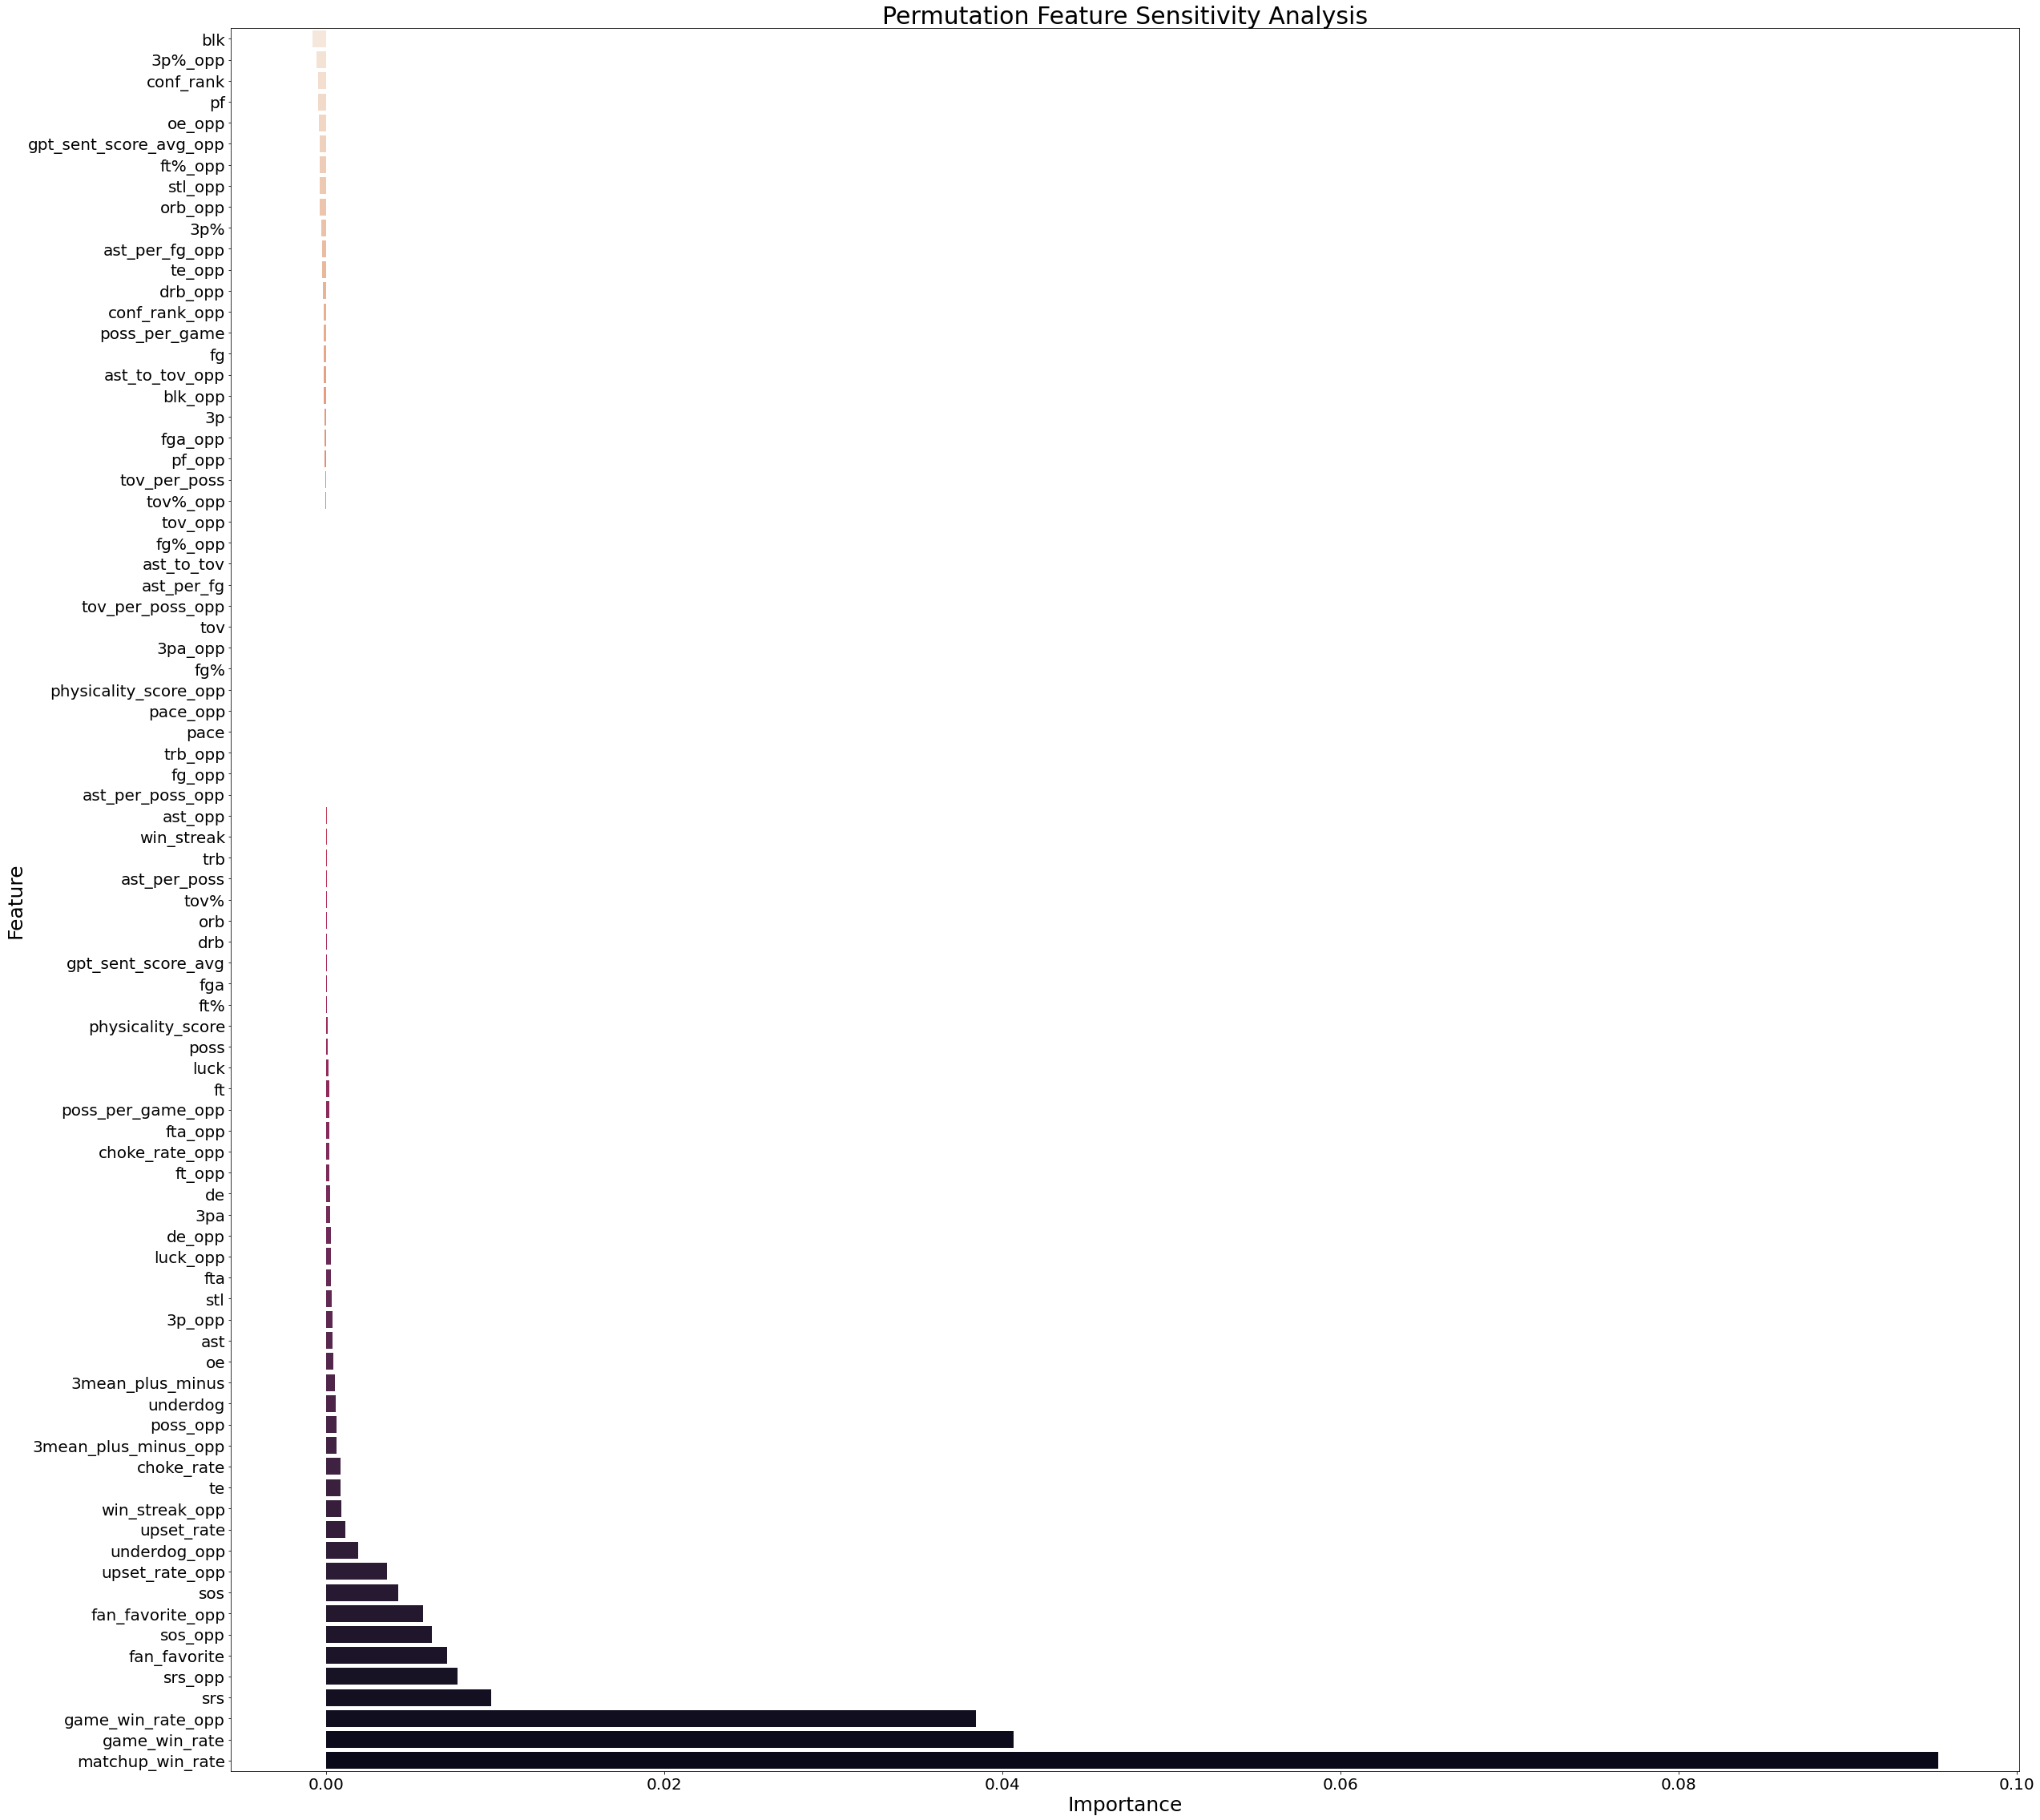

In [5]:
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
X_test_df = pd.DataFrame(X_test, columns=feature_names)
features = X_test_df.columns
importances = result.importances_mean
df_importances = pd.DataFrame({'Feature': features, 'Importance': importances})
df_importances = df_importances.sort_values('Importance', ascending=True)
plt.figure(figsize=(40, 40))
sns.barplot(x='Importance', y='Feature', data=df_importances, palette='rocket_r')
plt.xlabel('Importance',fontsize = 25)
plt.ylabel('Feature', fontsize = 25)
plt.title('Permutation Feature Sensitivity Analysis', fontsize = 30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

In [6]:
feature_importances = zip(feature_names, importances)
sorted_feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
sorted_features = [(feature, score) for feature, score in sorted_feature_importances]
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")

matchup_win_rate: 0.09533147773279348
game_win_rate: 0.040662955465587
game_win_rate_opp: 0.03842358299595137
srs: 0.00976720647773276
srs_opp: 0.007768218623481727
fan_favorite: 0.007173582995951356
sos_opp: 0.006237348178137603
fan_favorite_opp: 0.005718623481781327
sos: 0.004276315789473628
upset_rate_opp: 0.0035931174089068206
underdog_opp: 0.0018977732793521774
upset_rate: 0.0011639676113359698
win_streak_opp: 0.0009235829959513553
te: 0.0008476720647772829
choke_rate: 0.00083502024291493
3mean_plus_minus_opp: 0.0006072874493926572
poss_opp: 0.0006072874493926461
underdog: 0.0005946356275303045
3mean_plus_minus: 0.0005060728744938792
oe: 0.0004301619433197956
ast: 0.0003795546558704066
3p_opp: 0.0003795546558703844
stl: 0.00031629554655864255
fta: 0.00029099190283398134
luck_opp: 0.00027834008097162857
de_opp: 0.00027834008097159523
3pa: 0.00022773279352223953
de: 0.0002277327935222173
ft_opp: 0.0002150809716598867
choke_rate_opp: 0.0002150809716598645
fta_opp: 0.00018977732793519